# Genie Graph

## 필요 라이브러리 로드

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [137]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [138]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [139]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [140]:
site_name = 'genie'

In [141]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [142]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [143]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [144]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_genie_20220405.xlsx
1 live_genie_20220406.xlsx
2 live_genie_20220407.xlsx
3 live_genie_20220408.xlsx
4 live_genie_20220412.xlsx
5 live_genie_20220413.xlsx
6 live_genie_20220413_152916.xlsx
7 live_genie_20220414_134752.xlsx
8 live_genie_20220415_180602.xlsx
9 live_genie_20220418_110238.xlsx
10 live_genie_20220419_110232.xlsx
11 live_genie_20220420_110217.xlsx
12 live_genie_20220421_110254.xlsx
13 live_genie_20220422_110235.xlsx
14 live_genie_20220425_110255.xlsx
15 live_genie_20220426_110231.xlsx
16 live_genie_20220427_110229.xlsx
17 live_genie_20220428_110201.xlsx
18 live_genie_20220429_110201.xlsx
19 live_genie_20220430_110201.xlsx
20 live_genie_20220501_110202.xlsx
21 live_genie_20220502_110201.xlsx
22 live_genie_20220503_110201.xlsx
23 live_genie_20220504_110201.xlsx
24 live_genie_20220505_110201.xlsx
25 live_genie_20220506_110201.xlsx
26 live_genie_20220507_110201.xlsx
27 live_genie_20220508_110202.xlsx
28 live_genie_20220509_110201.xlsx


## 수집한 파일 모두 합치기

In [145]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

사이트                   날짜  순위                     곡                 가수  \
0  genie  2022-04-05 00:00:00   1                TOMBOY            (여자)아이들   
1  genie  2022-04-05 00:00:00   2        Feel My Rhythm  Red Velvet (레드벨벳)   
2  genie  2022-04-05 00:00:00   3  GANADARA (Feat. 아이유)                박재범   
3  genie  2022-04-05 00:00:00   4                사랑인가 봐   멜로망스 (MeloMance)   
4  genie  2022-04-05 00:00:00   5                듣고 싶을까     MSG워너비 (M.O.M)   

                                          앨범          소속사 소속사_분류  
0                                I NEVER DIE         CUBE     기타  
1  'The ReVe Festival 2022 - Feel My Rhythm'           SM     SM  
2                                   GANADARA  MORE VISION     기타  
3                   사랑인가 봐 (사내맞선 OST 스페셜 트랙)        ABYSS     기타  
4                                     듣고 싶을까          MBC     기타

In [146]:
df['날짜'] = df['날짜'].astype(str)

In [147]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

사이트          날짜  순위                                      곡  \
0  genie  2022-05-02   1  That That (Prod. & Feat. SUGA of BTS)   
1  genie  2022-05-02   2                   봄여름가을겨울 (Still Life)   
2  genie  2022-05-02   3                              LOVE DIVE   
3  genie  2022-05-02   4                                 TOMBOY   
4  genie  2022-05-02   5                                 사랑인가 봐   

                 가수                        앨범    소속사 소속사_분류  
0          싸이 (Psy)                       싸다9    NaN    NaN  
1      BIGBANG (빅뱅)      봄여름가을겨울 (Still Life)     YG     YG  
2         IVE (아이브)                 LOVE DIVE    스타쉽    스타쉽  
3           (여자)아이들               I NEVER DIE   CUBE     기타  
4  멜로망스 (MeloMance)  사랑인가 봐 (사내맞선 OST 스페셜 트랙)  ABYSS     기타

In [148]:
sliced_df.tail()

사이트          날짜   순위               곡                    가수  \
695  genie  2022-05-08   96    롤린 (Rollin')  브레이브걸스 (Brave girls)   
696  genie  2022-05-08   97         봄 to 러브                  10CM   
697  genie  2022-05-08   98  Because Of You                 Ne-Yo   
698  genie  2022-05-08   99             고맙소                   김호중   
699  genie  2022-05-08  100       Step Back          GOT the beat   

                      앨범          소속사 소속사_분류  
695              Rollin'        BRAVE     기타  
696  우리들의 블루스 OST Part 3  매직스트로베리 사운드     기타  
697       Because Of You          NaN    NaN  
698    내일은 미스터트롯 결승전 베스트           생각     기타  
699            Step Back           SM     SM

In [149]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     700 non-null    object
 1   날짜      700 non-null    object
 2   순위      700 non-null    int64 
 3   곡       700 non-null    object
 4   가수      700 non-null    object
 5   앨범      700 non-null    object
 6   소속사     641 non-null    object
 7   소속사_분류  641 non-null    object
dtypes: int64(1), object(7)
memory usage: 43.9+ KB


### 수집한 곡의 유니크

In [150]:
len(sliced_df['곡'].unique())

126

In [151]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

날짜
0  2022-05-02
1  2022-05-03
2  2022-05-04
3  2022-05-05
4  2022-05-06
5  2022-05-07
6  2022-05-08

### 제목과 가수 매칭 값 추출

In [152]:
sort_df = sliced_df[['곡', '가수']]
sort_df

곡                    가수
0    That That (Prod. & Feat. SUGA of BTS)              싸이 (Psy)
1                     봄여름가을겨울 (Still Life)          BIGBANG (빅뱅)
2                                LOVE DIVE             IVE (아이브)
3                                   TOMBOY               (여자)아이들
4                                   사랑인가 봐      멜로망스 (MeloMance)
..                                     ...                   ...
695                           롤린 (Rollin')  브레이브걸스 (Brave girls)
696                                봄 to 러브                  10CM
697                         Because Of You                 Ne-Yo
698                                    고맙소                   김호중
699                              Step Back          GOT the beat

[700 rows x 2 columns]

In [153]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

곡                가수
0        That That (Prod. & Feat. SUGA of BTS)          싸이 (Psy)
1                         봄여름가을겨울 (Still Life)      BIGBANG (빅뱅)
2                                    LOVE DIVE         IVE (아이브)
3                                       TOMBOY           (여자)아이들
4                                       사랑인가 봐  멜로망스 (MeloMance)
..                                         ...               ...
121                                         여행            볼빨간사춘기
122  작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)             방탄소년단
123                                     기억해 줘요               다비치
124                    어떻게 지내 (Prod. by VAN.C)                오반
125                                        고맙소               김호중

[126 rows x 2 columns]

### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [154]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [155]:
len(song_df_list)

126

## 그래프 테스트

### 노래 선택

In [156]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   사이트     7 non-null      object
 2   순위      7 non-null      int64 
 3   곡       7 non-null      object
 4   가수      7 non-null      object
 5   앨범      7 non-null      object
 6   소속사     7 non-null      object
 7   소속사_분류  7 non-null      object
 8   순위변동    7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 560.0+ bytes


In [157]:
tmp = song_df_list[100]
tmp

날짜    사이트    순위            곡   가수       앨범    소속사 소속사_분류  순위변동
0  2022-05-02    NaN   NaN  다시 만날 수 있을까  임영웅  IM HERO    NaN    NaN   NaN
1  2022-05-03  genie   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
2  2022-05-04  genie  12.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타  -3.0
3  2022-05-05  genie   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   3.0
4  2022-05-06  genie  11.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타  -2.0
5  2022-05-07  genie  11.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
6  2022-05-08  genie   8.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   3.0

In [158]:
tmp['곡'].value_counts().index.values[0]

'다시 만날 수 있을까'

In [159]:
tmp['가수'].value_counts().index.values[0]

'임영웅'

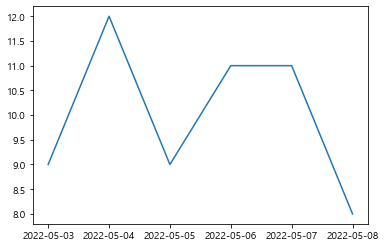

In [160]:
plt.plot(tmp['날짜'], tmp['순위'])

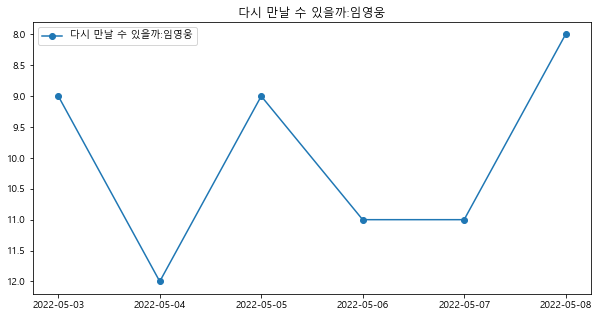

In [161]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [162]:
temp_df = song_df_list[70:91]

### 그래프

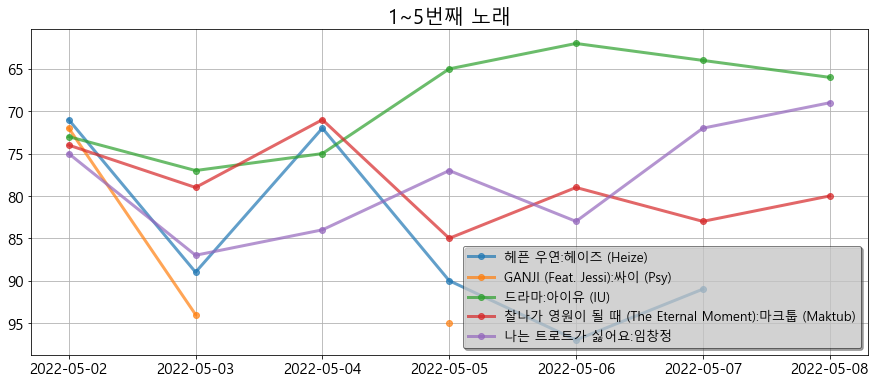

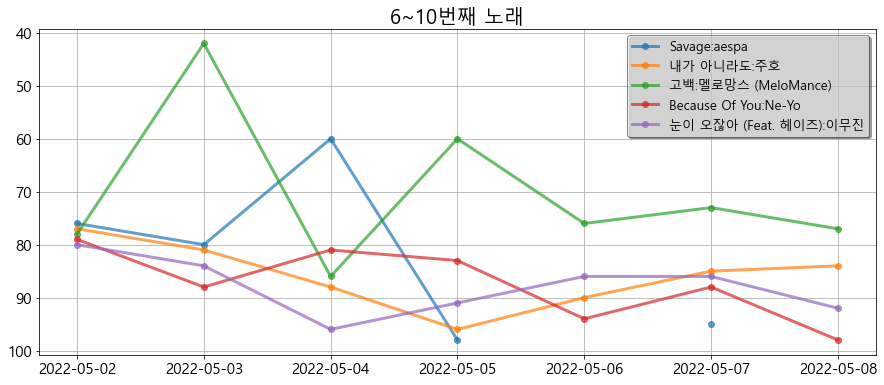

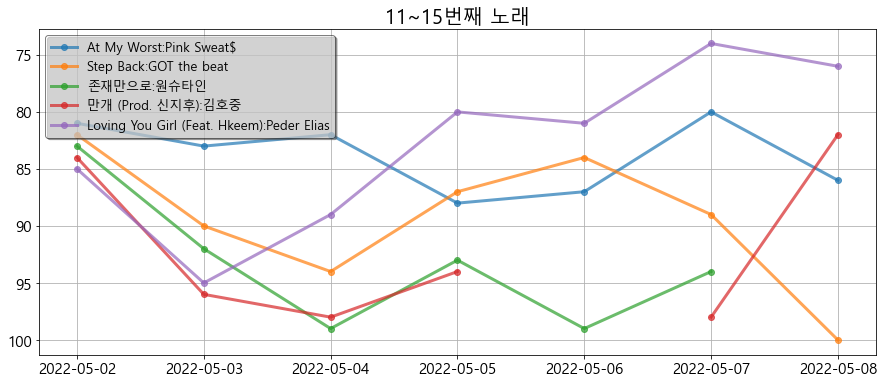

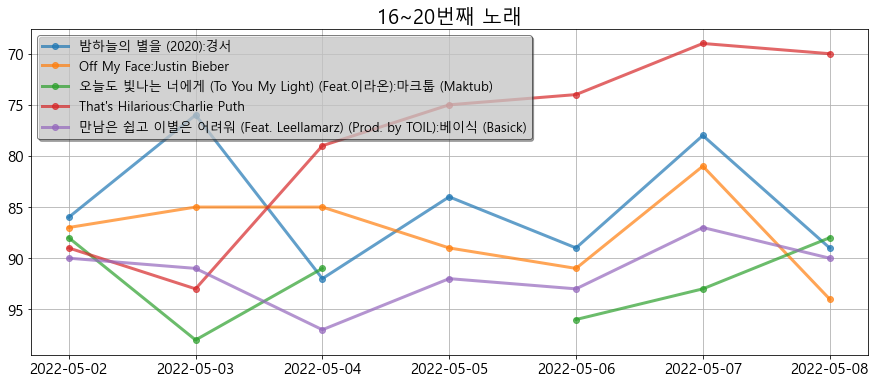

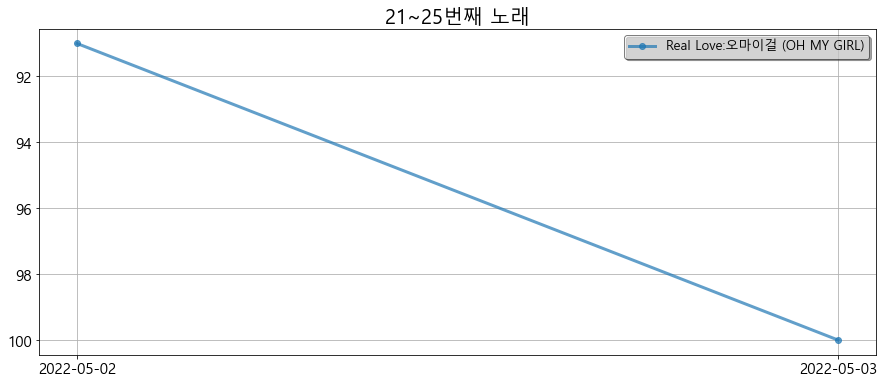

In [163]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [164]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

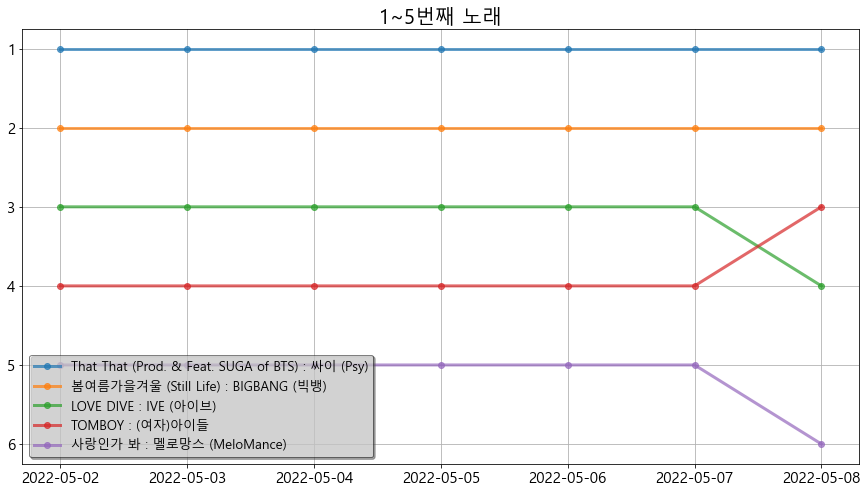

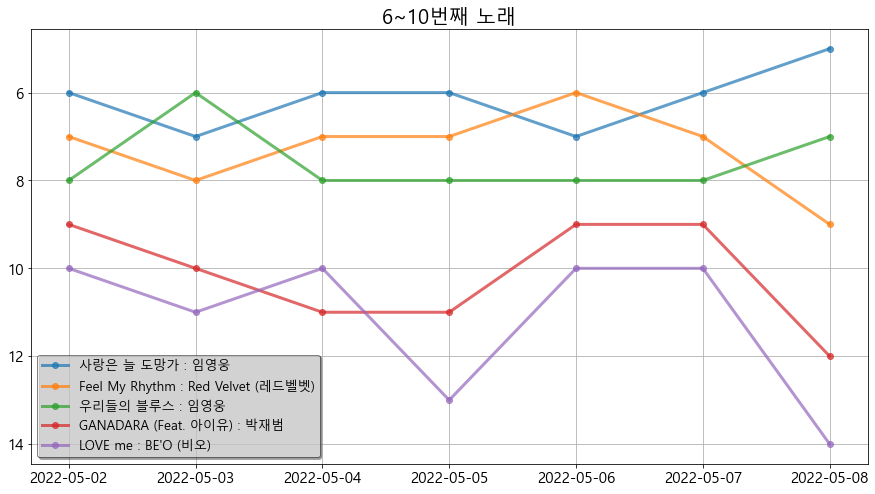

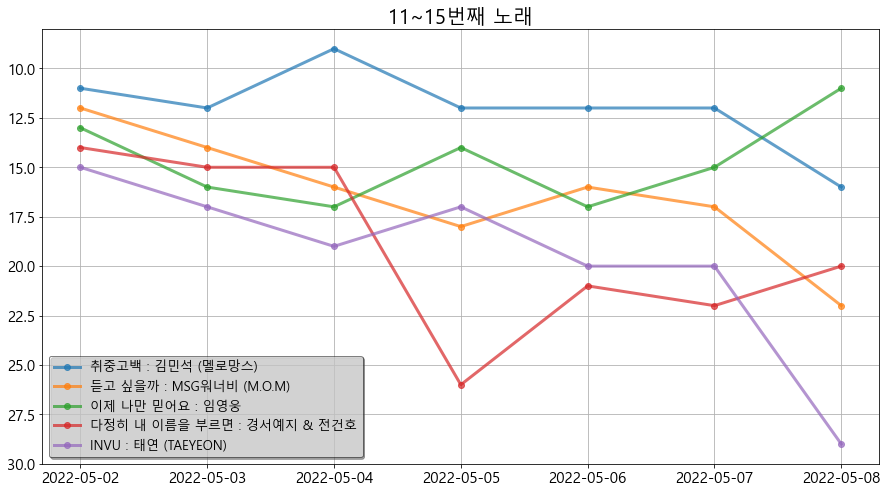

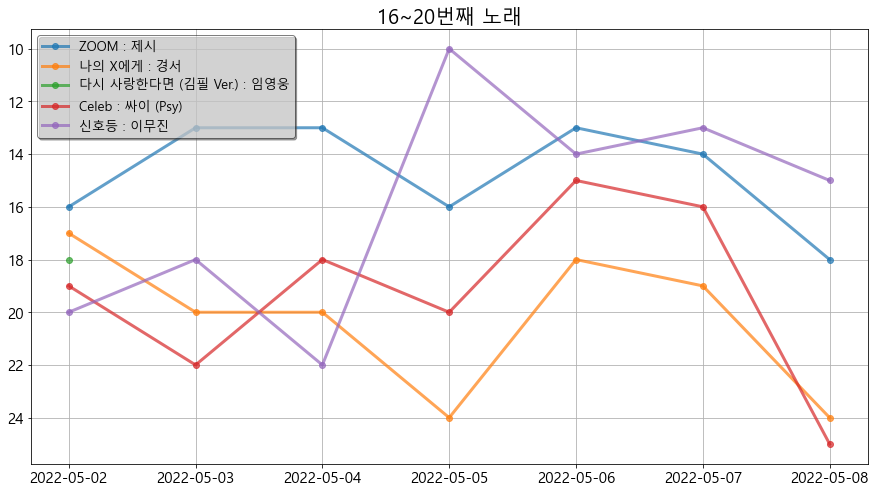

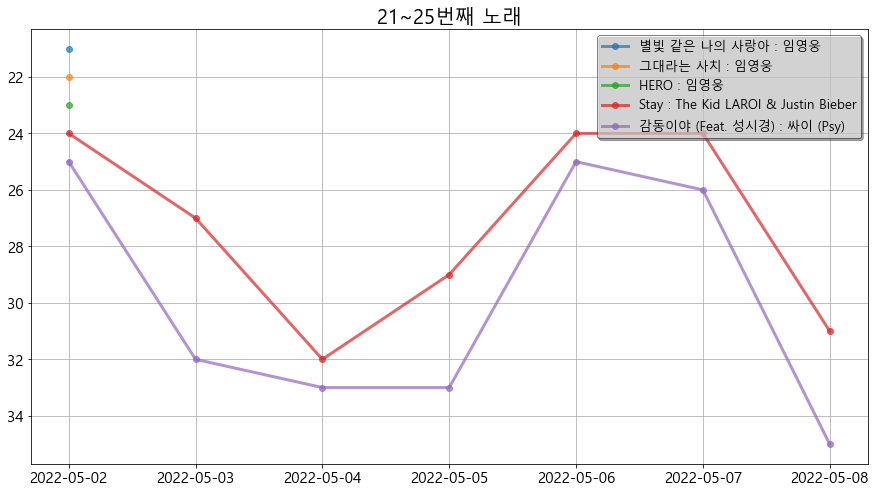

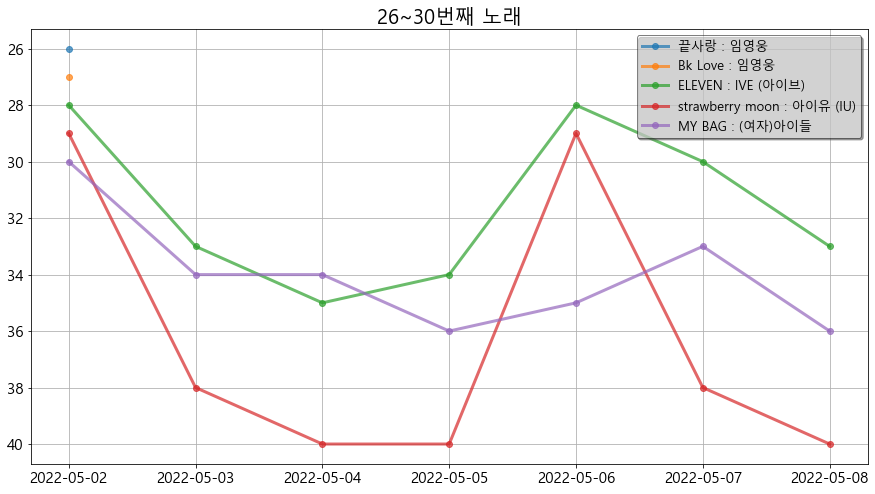

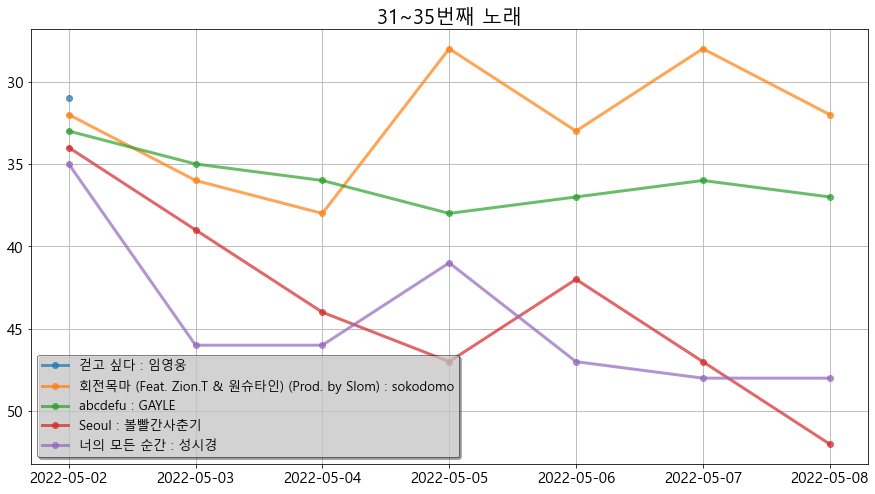

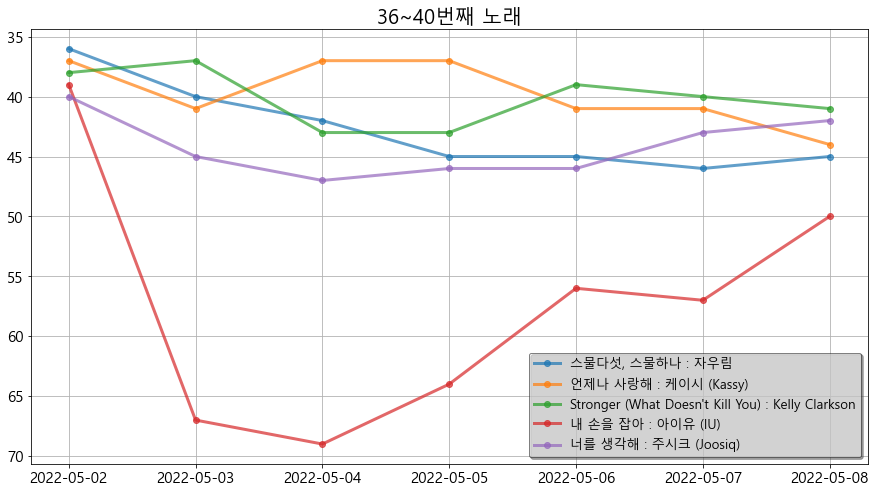

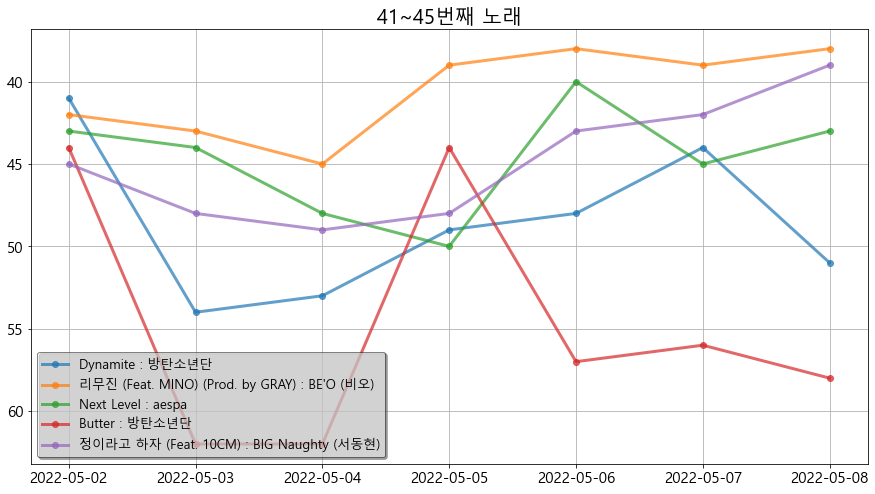

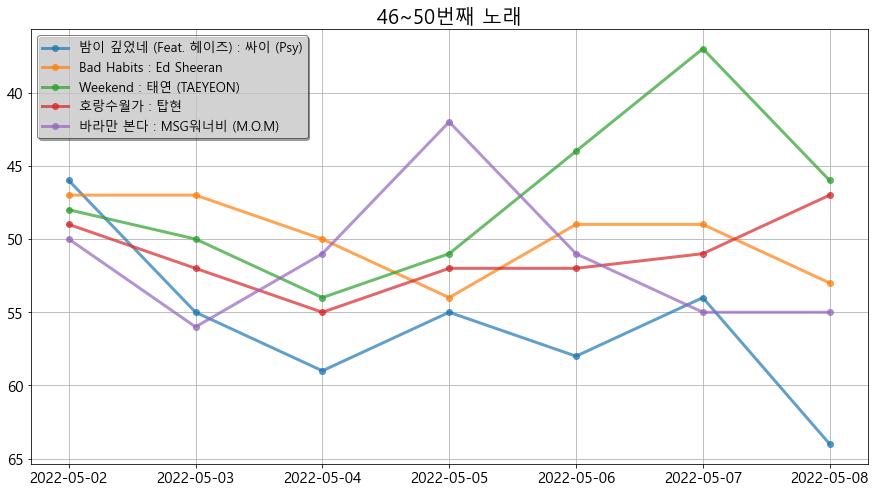

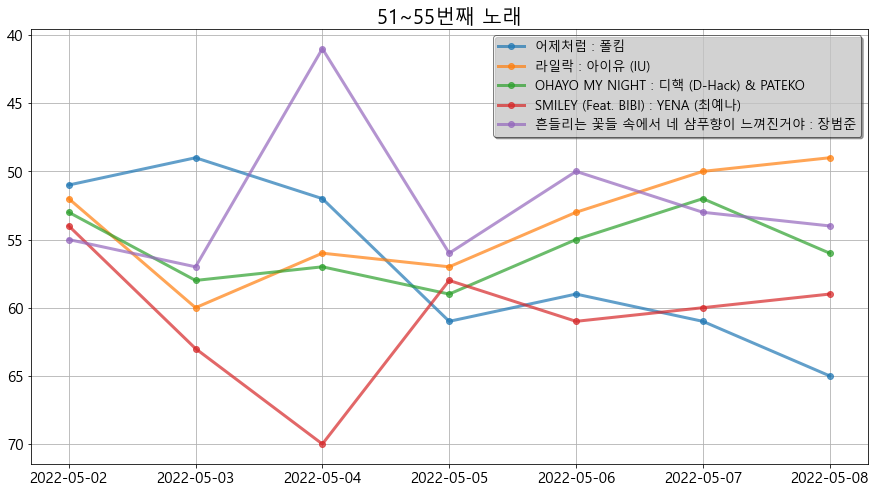

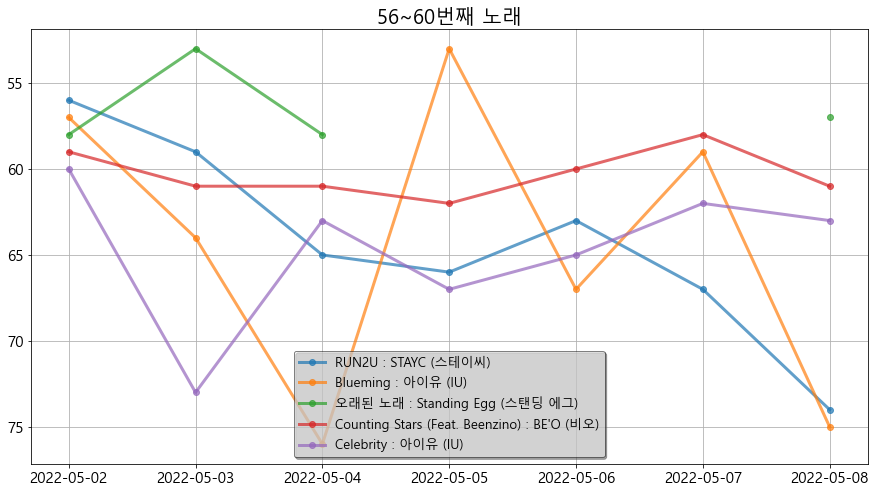

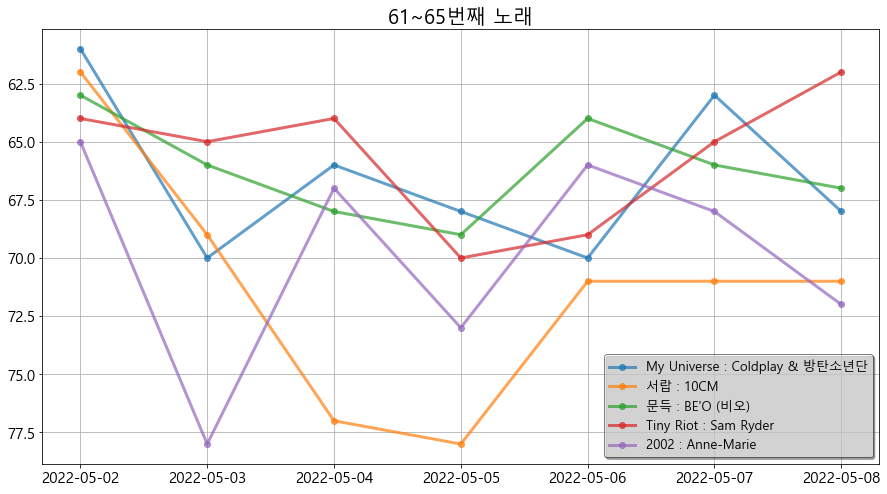

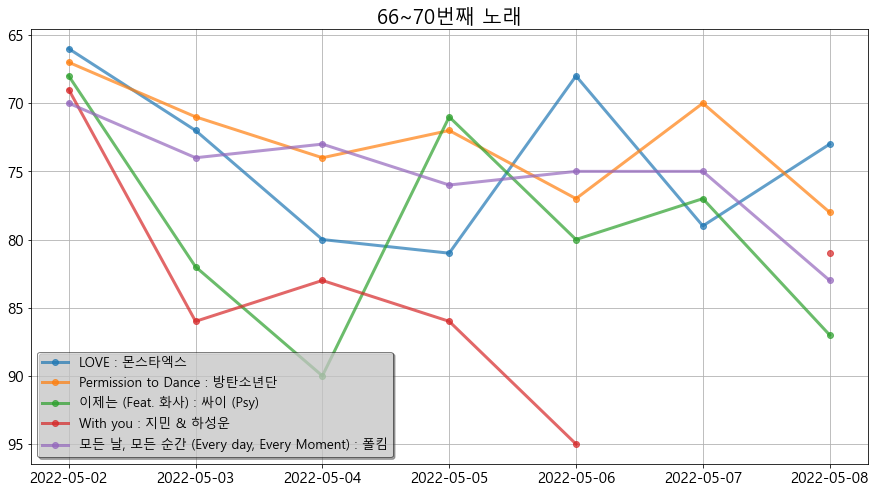

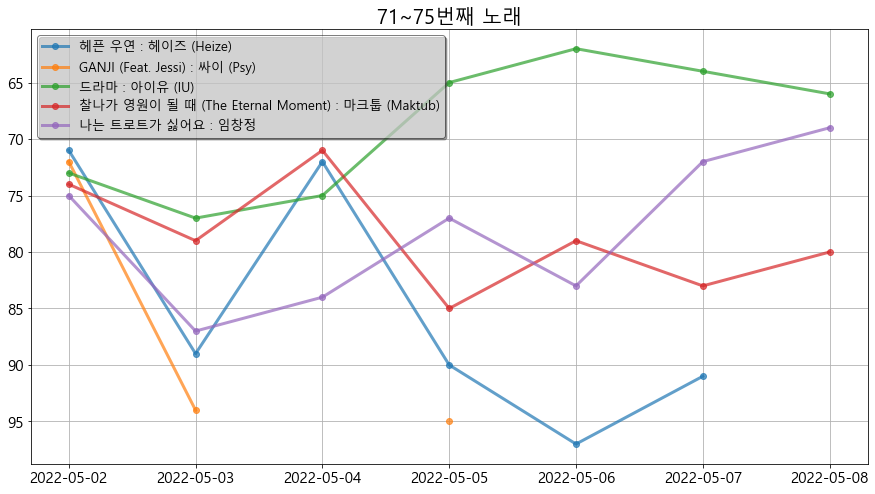

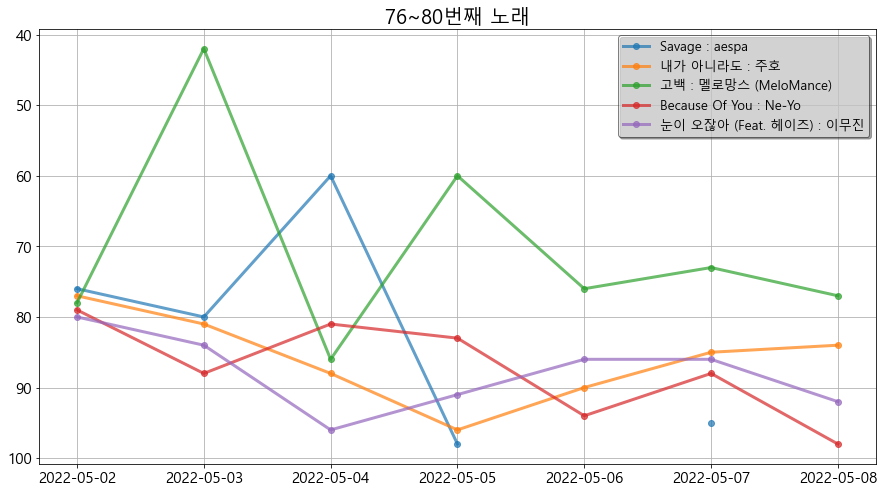

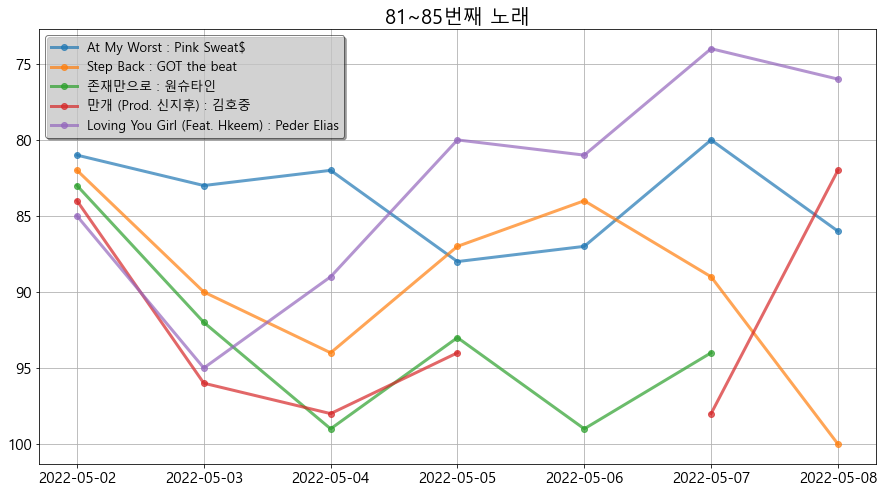

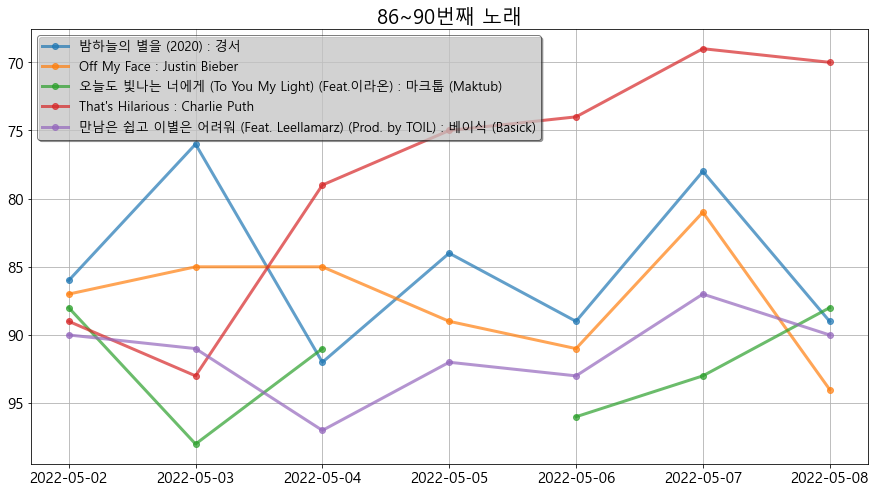

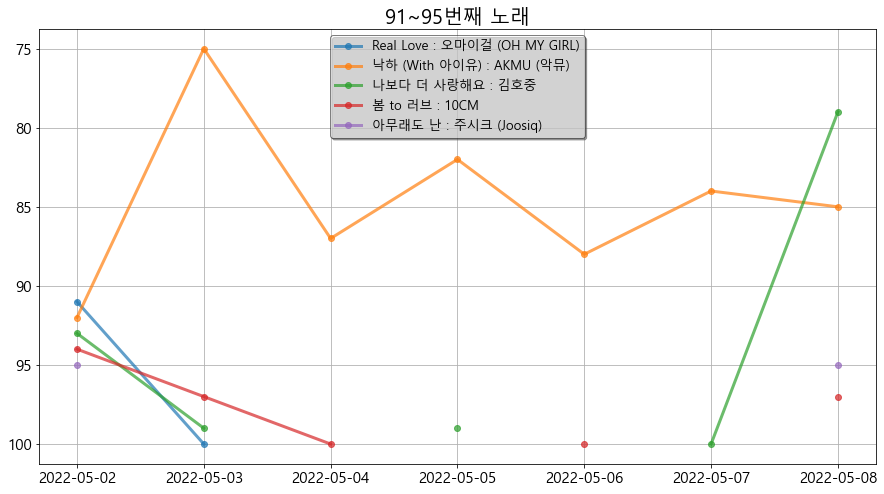

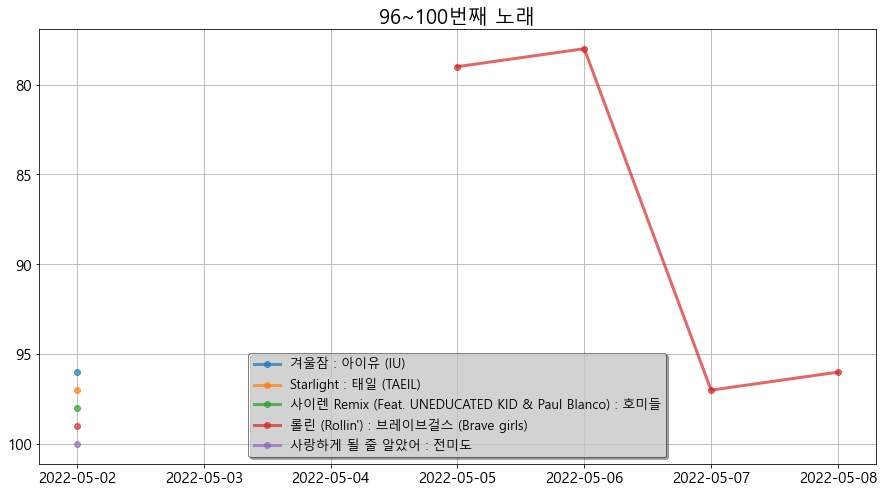

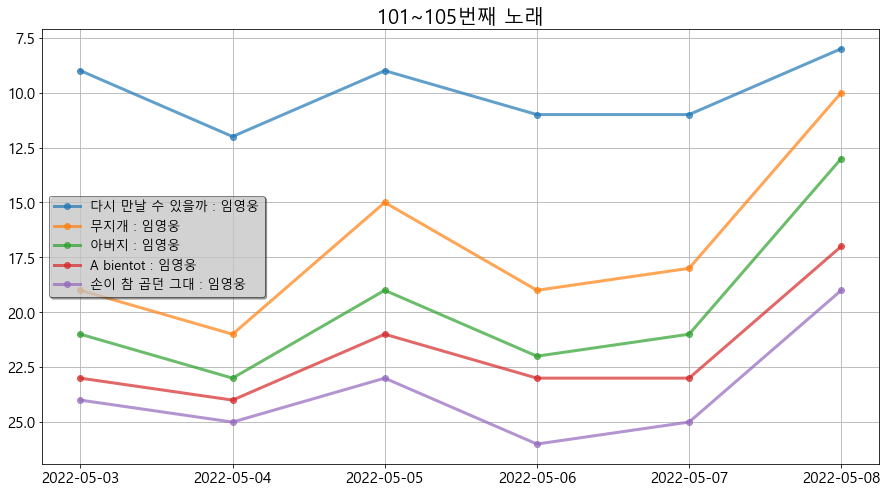

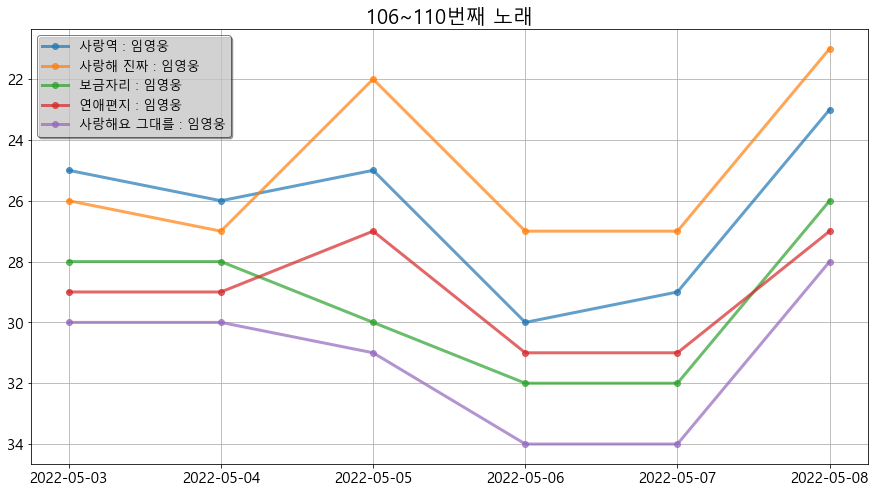

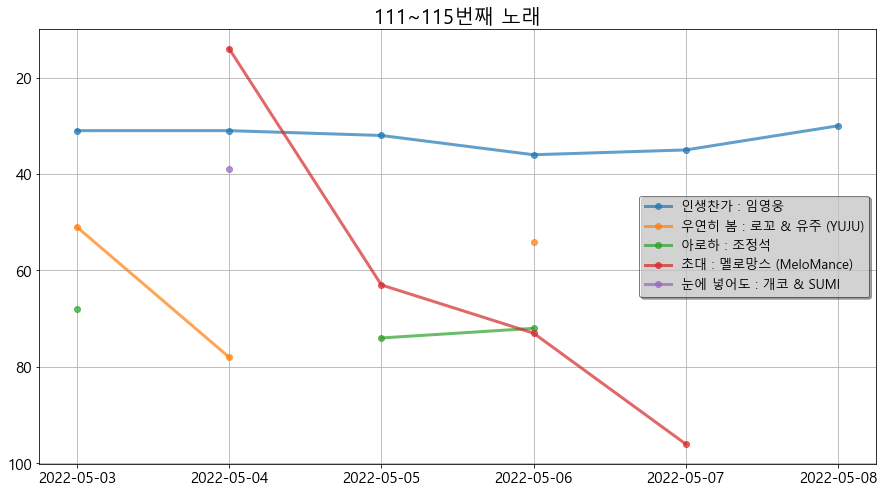

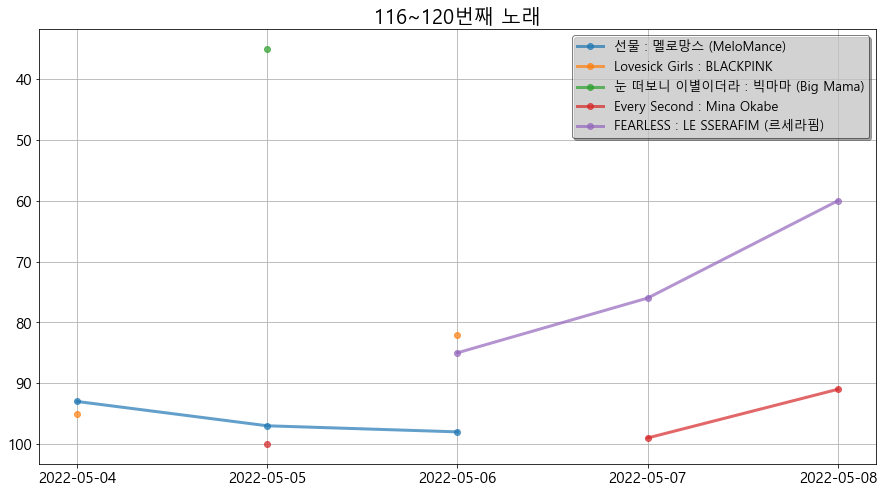

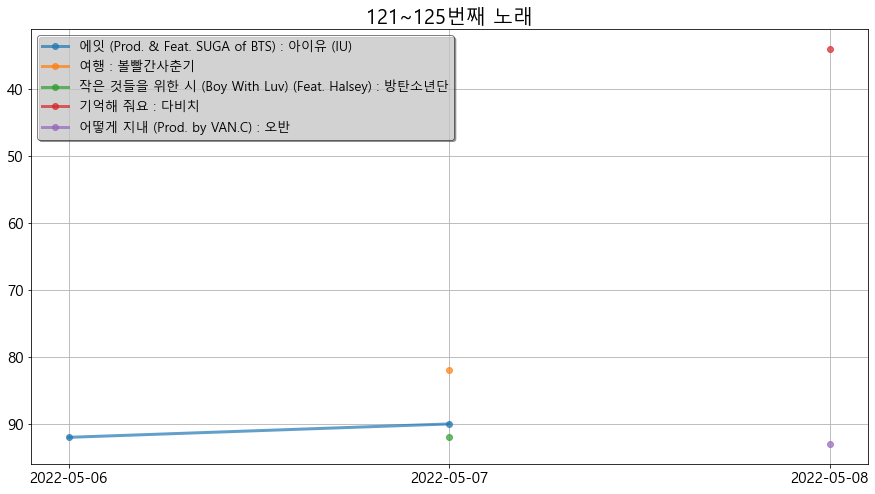

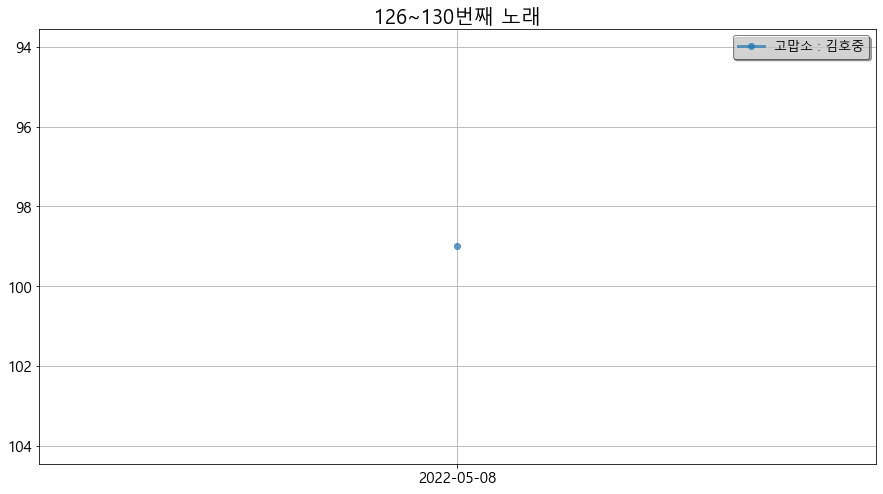

In [165]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [166]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

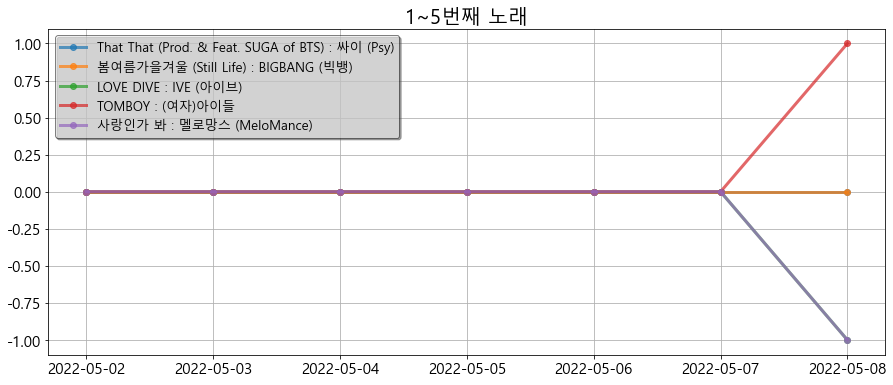

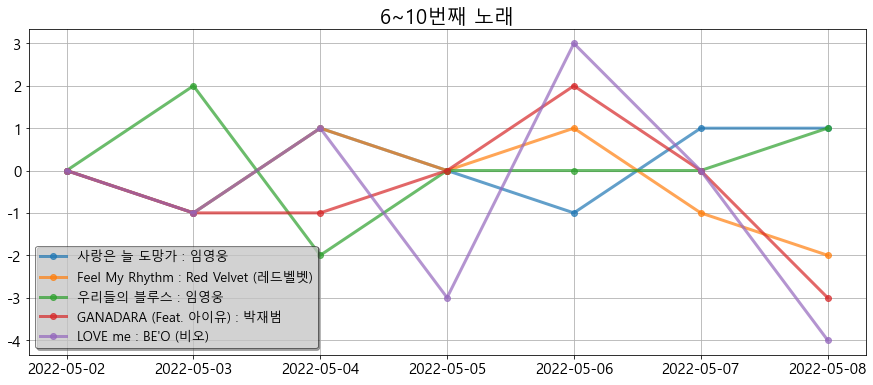

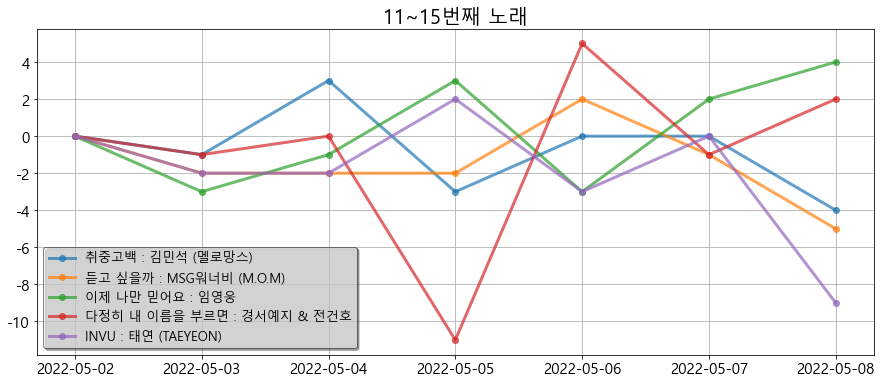

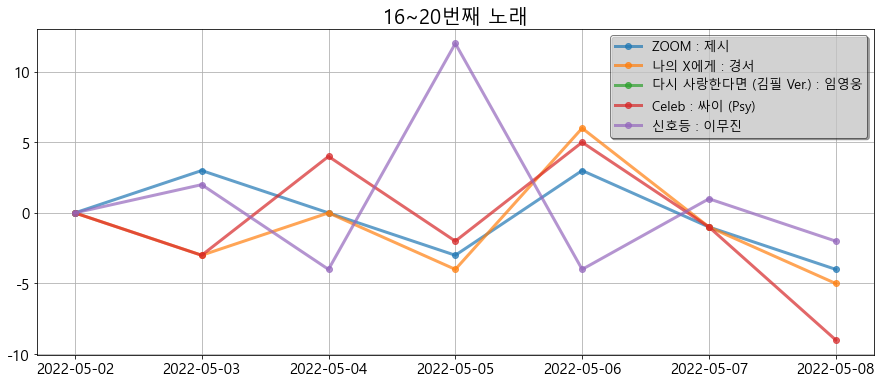

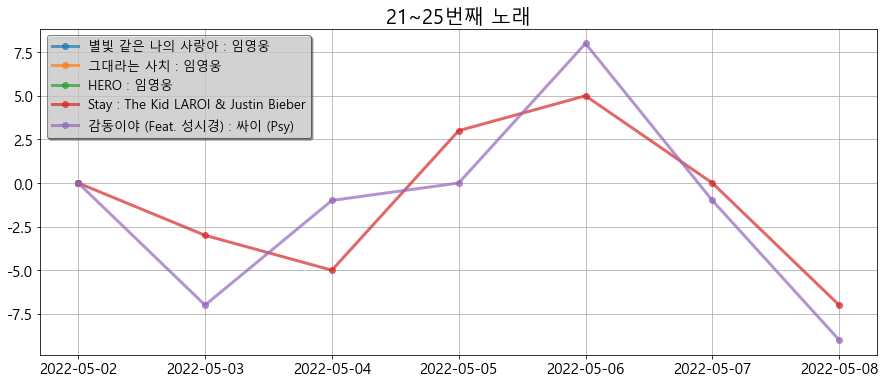

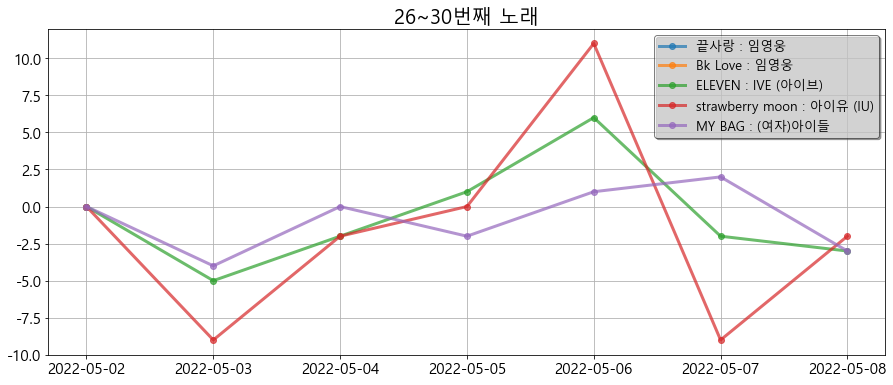

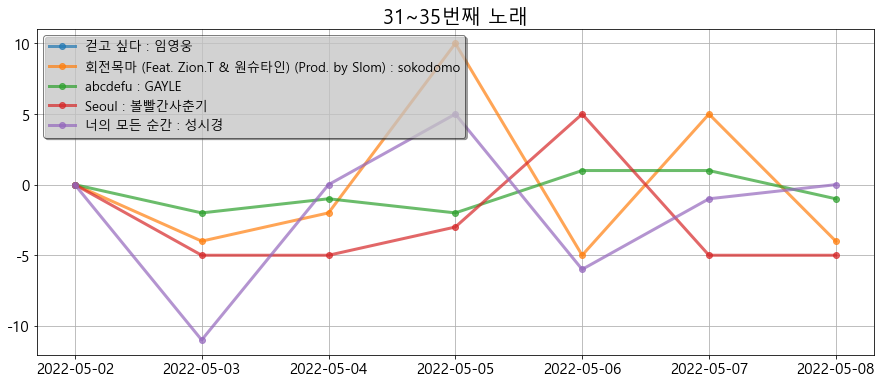

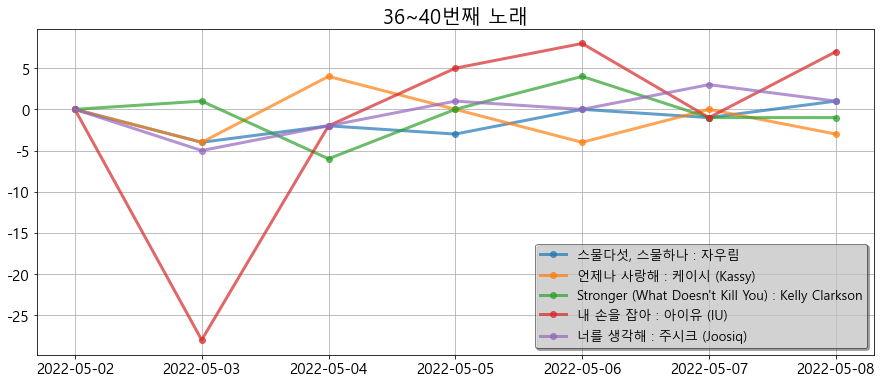

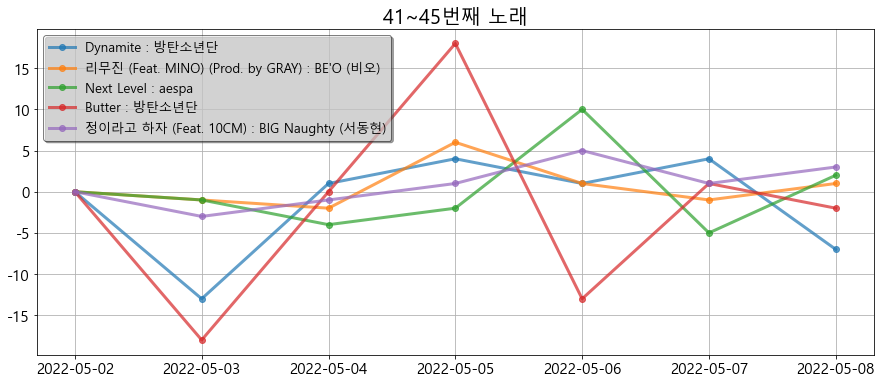

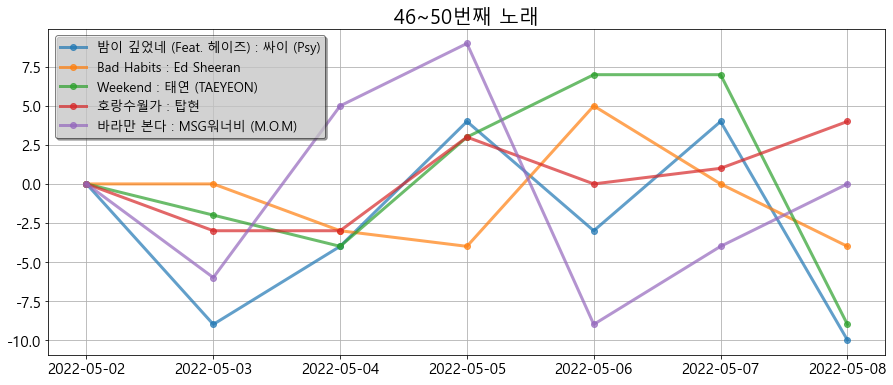

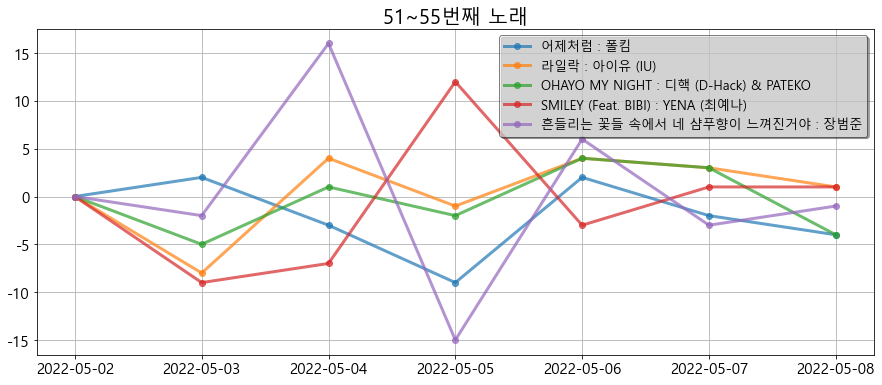

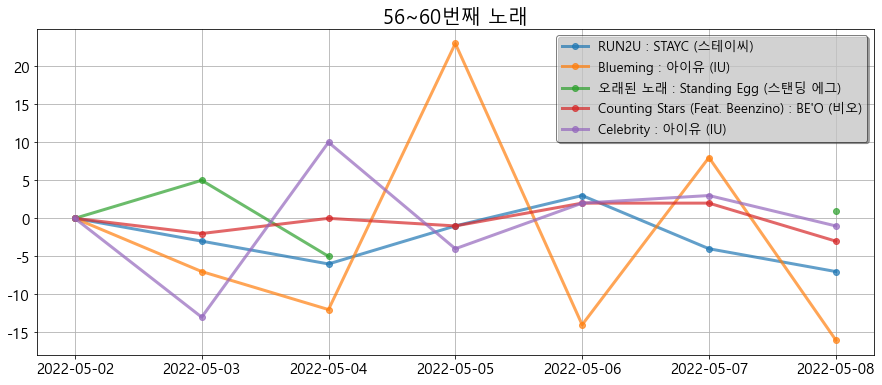

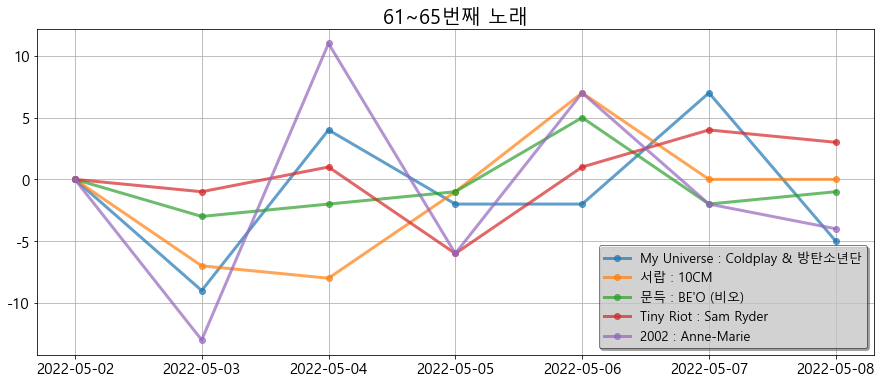

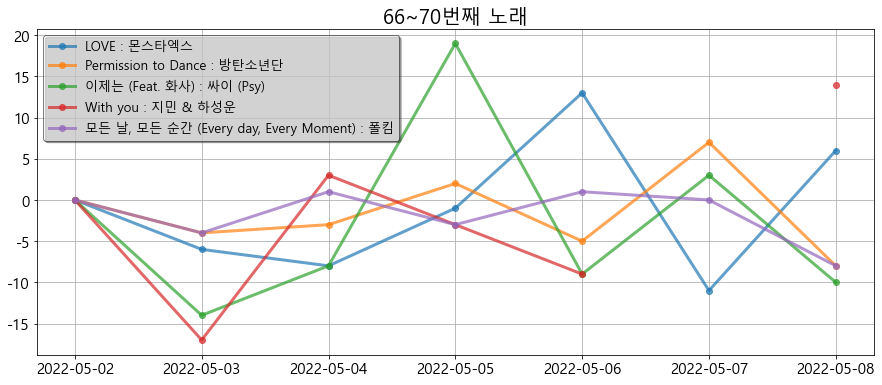

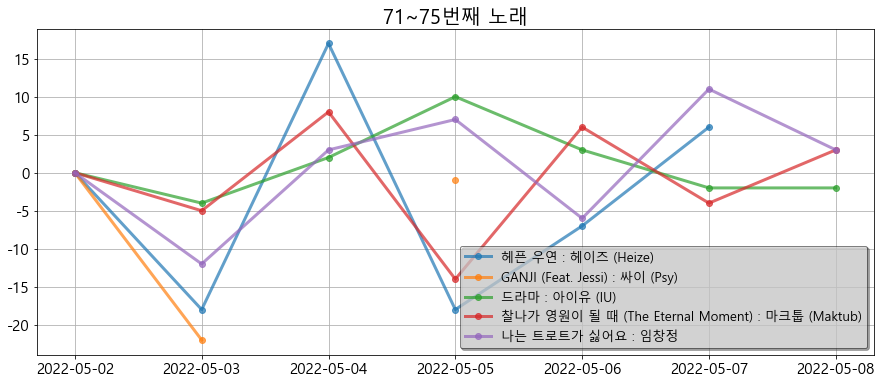

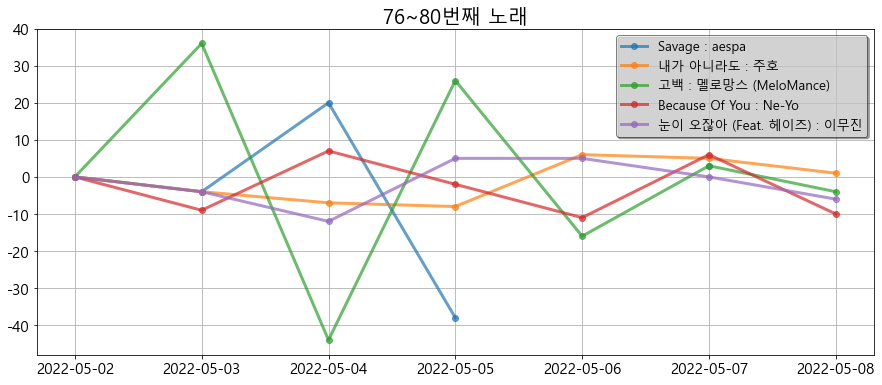

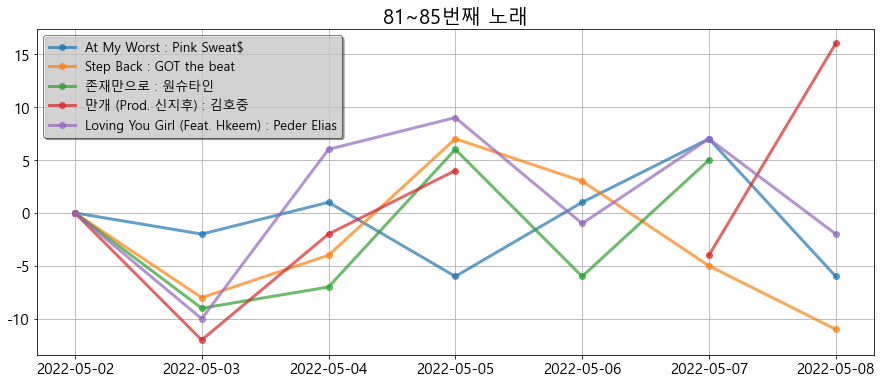

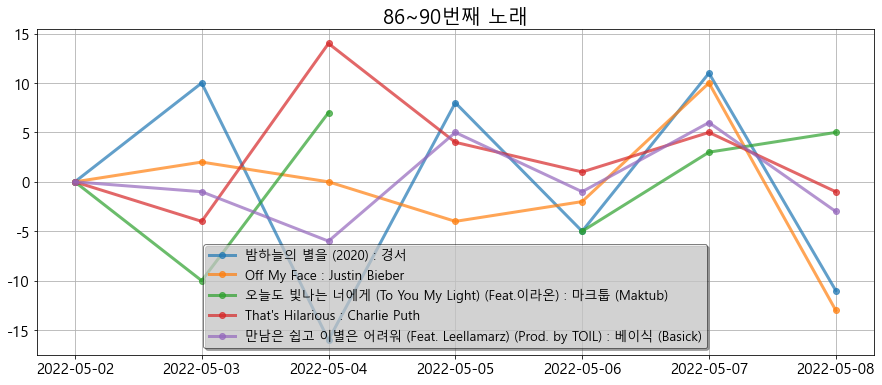

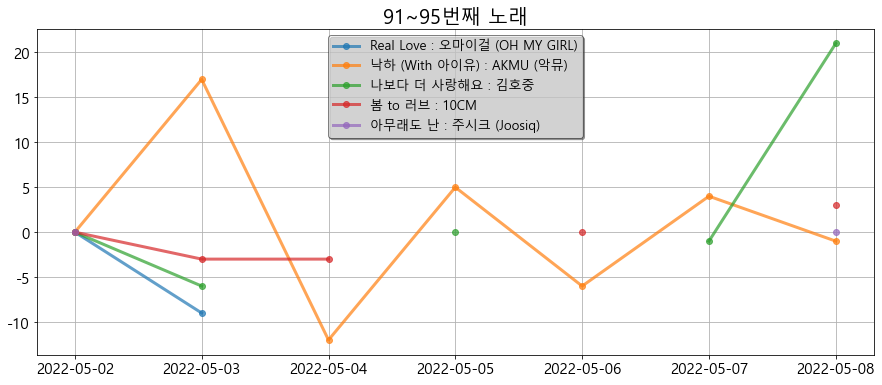

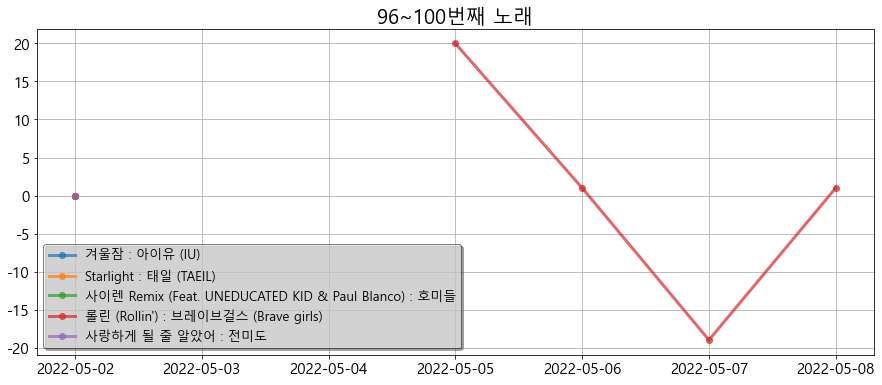

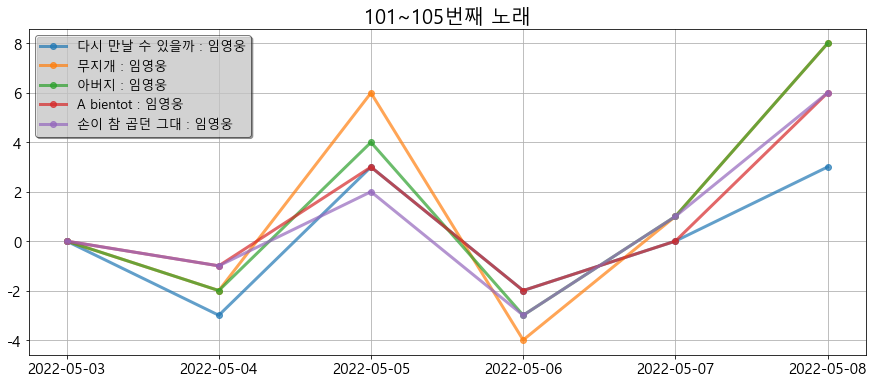

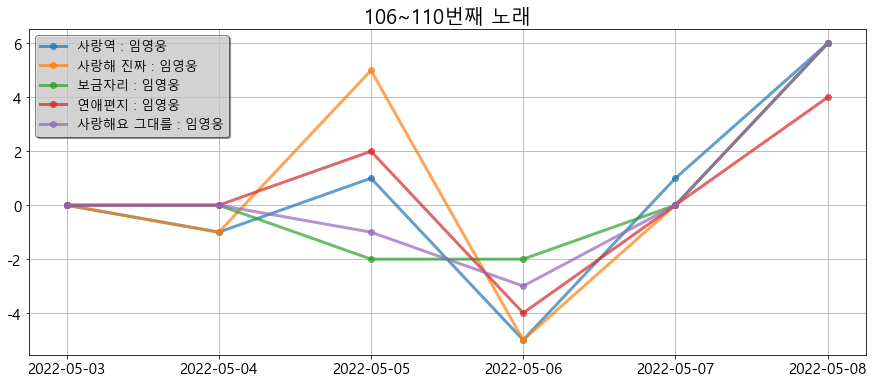

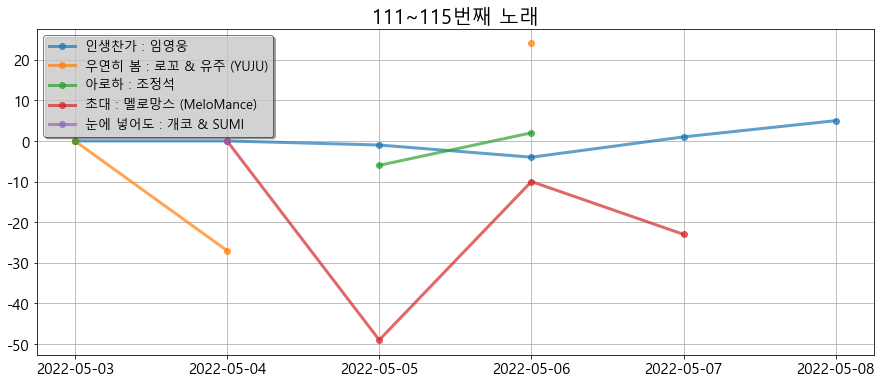

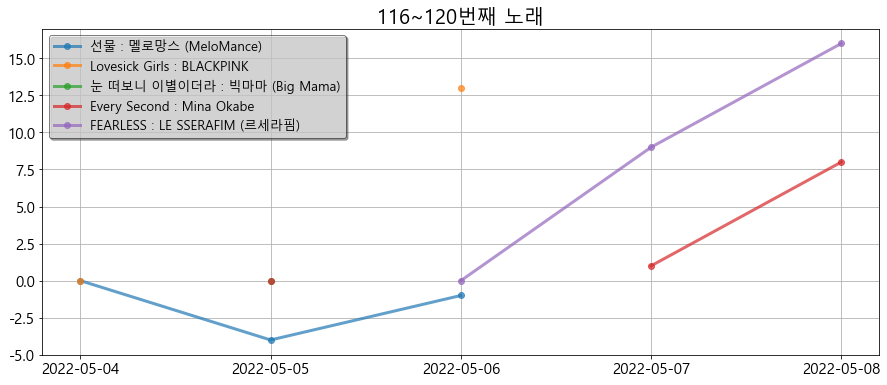

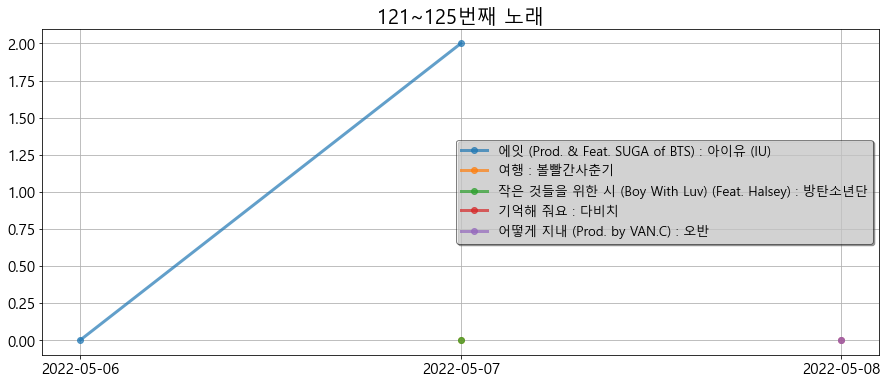

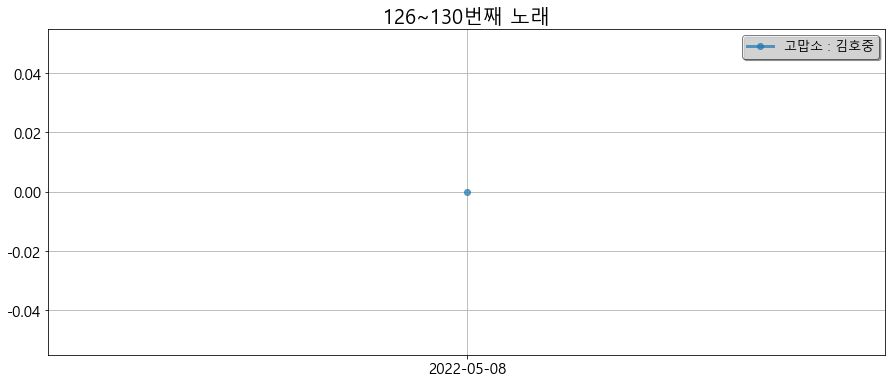

In [167]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [168]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [169]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      882 non-null    object 
 1   사이트     700 non-null    object 
 2   순위      700 non-null    float64
 3   곡       882 non-null    object 
 4   가수      882 non-null    object 
 5   앨범      882 non-null    object 
 6   소속사     641 non-null    object 
 7   소속사_분류  641 non-null    object 
 8   순위변동    700 non-null    float64
dtypes: float64(2), object(7)
memory usage: 62.1+ KB


In [170]:
total_df['순위변동'].describe()

count    700.000000
mean      -0.624286
std        6.604090
min      -49.000000
25%       -3.000000
50%        0.000000
75%        1.000000
max       36.000000
Name: 순위변동, dtype: float64

In [171]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    211.000000
mean       5.350711
std        5.224506
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       36.000000
Name: 순위변동, dtype: float64

In [172]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

2.0 7.0 5.0 14.5


### 이상치 곡 추출

In [173]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

날짜    사이트    순위                         곡                    가수  \
0   2022-05-05  genie  44.0                    Butter                 방탄소년단   
1   2022-05-04  genie  41.0  흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야                   장범준   
2   2022-05-05  genie  53.0                  Blueming              아이유 (IU)   
3   2022-05-05  genie  71.0            이제는 (Feat. 화사)              싸이 (Psy)   
4   2022-05-04  genie  72.0                     헤픈 우연           헤이즈 (Heize)   
5   2022-05-04  genie  60.0                    Savage                 aespa   
6   2022-05-03  genie  42.0                        고백      멜로망스 (MeloMance)   
7   2022-05-08  genie  82.0            만개 (Prod. 신지후)                   김호중   
8   2022-05-03  genie  75.0             낙하 (With 아이유)             AKMU (악뮤)   
9   2022-05-08  genie  79.0                나보다 더 사랑해요                   김호중   
10  2022-05-05  genie  79.0              롤린 (Rollin')  브레이브걸스 (Brave girls)   
11  2022-05-06  genie  54.0                     우연히 봄        로꼬 & 유주 (YUJU)   
12  2022-05-08  genie  60.0                  FEARLESS    LE SSERAFIM (르세라핌)   

                                  앨범           소속사 소속사_분류  순위변동  
0                             Butter           빅히트    빅히트  18.0  
1    멜로가 체질 OST Part 3 (JTBC 금토 드라마)            개인     기타  16.0  
2                          Love poem          EDAM     기타  23.0  
3                                싸다9           NaN    NaN  19.0  
4                             HAPPEN      P NATION     기타  17.0  
5        Savage - The 1st Mini Album            SM     SM  20.0  
6                          세 번째 '고백'         ABYSS     기타  36.0  
7                                우리家            생각     기타  16.0  
8                       NEXT EPISODE            YG     YG  17.0  
9                         나보다 더 사랑해요            생각     기타  21.0  
10                           Rollin'         BRAVE     기타  20.0  
11  냄새를 보는 소녀 OST Part.2 (SBS 수목드라마)            기타     기타  24.0  
12                          FEARLESS  SOURCE MUSIC     기타  16.0

In [174]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 13


In [ ]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [ ]:
# 이상치 음원 df 출력
outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_.csv', index=False)

### 급등 음원의 샘플 추출

In [175]:
big_change_music_name_list = outlier_df['곡'].tolist()
print('이상치 곡의 개수 :', len(big_change_music_name_list) ) 
print(big_change_music_name_list)

이상치 곡의 개수 : 13
['Butter', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야', 'Blueming', '이제는 (Feat. 화사)', '헤픈 우연', 'Savage', '고백', '만개 (Prod. 신지후)', '낙하 (With 아이유)', '나보다 더 사랑해요', "롤린 (Rollin')", '우연히 봄', 'FEARLESS']


In [176]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2] ].reset_index(drop=True)
temp

날짜    사이트    순위         곡        가수         앨범   소속사 소속사_분류  순위변동
0  2022-05-02  genie  57.0  Blueming  아이유 (IU)  Love poem  EDAM     기타   0.0
1  2022-05-03  genie  64.0  Blueming  아이유 (IU)  Love poem  EDAM     기타  -7.0
2  2022-05-04  genie  76.0  Blueming  아이유 (IU)  Love poem  EDAM     기타 -12.0
3  2022-05-05  genie  53.0  Blueming  아이유 (IU)  Love poem  EDAM     기타  23.0
4  2022-05-06  genie  67.0  Blueming  아이유 (IU)  Love poem  EDAM     기타 -14.0
5  2022-05-07  genie  59.0  Blueming  아이유 (IU)  Love poem  EDAM     기타   8.0
6  2022-05-08  genie  75.0  Blueming  아이유 (IU)  Love poem  EDAM     기타 -16.0

In [177]:
title = temp['곡'].value_counts().index[0]
title

'Blueming'

In [178]:
artist = temp['가수'].value_counts().index[0]
artist

'아이유 (IU)'

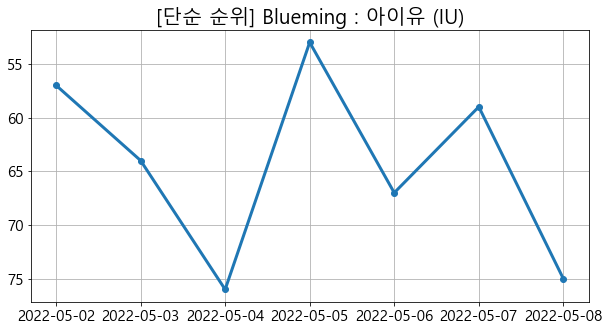

In [179]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

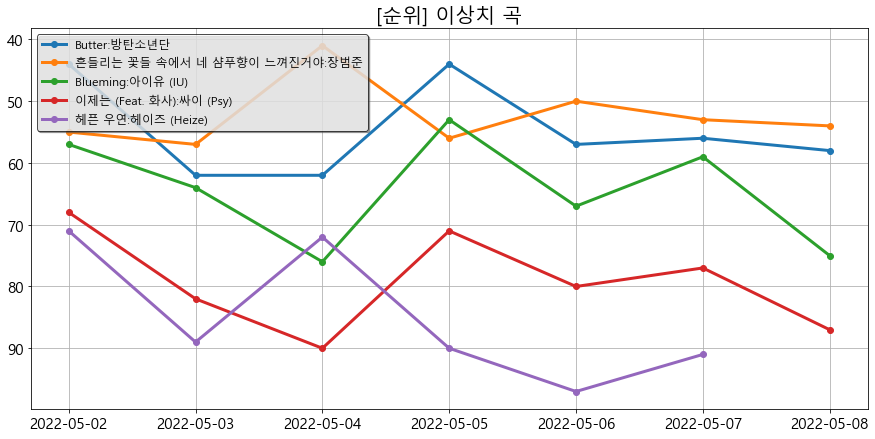

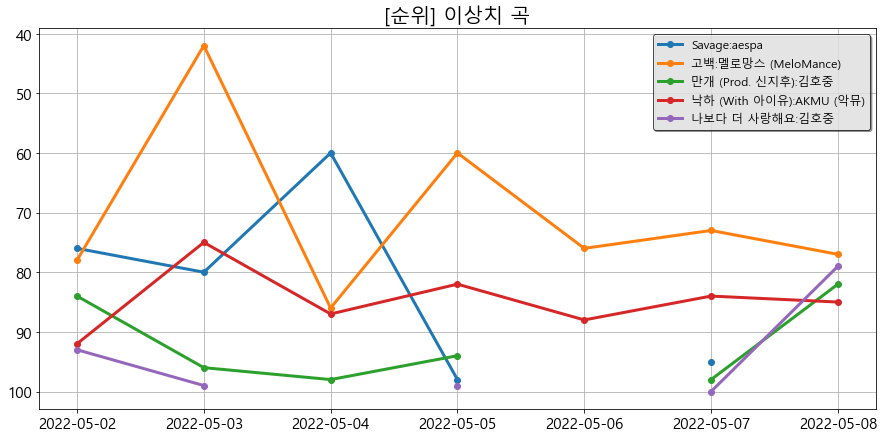

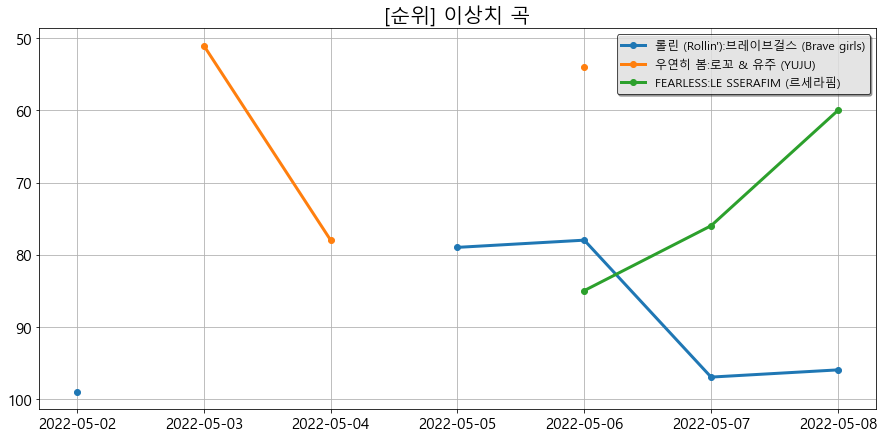

In [182]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

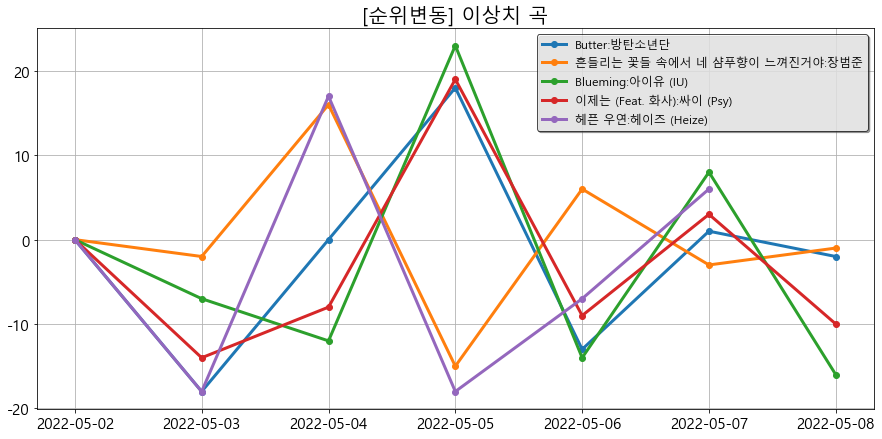

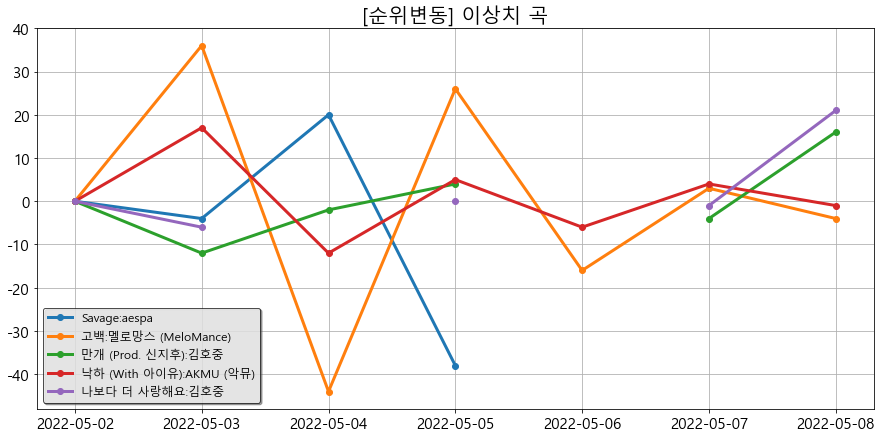

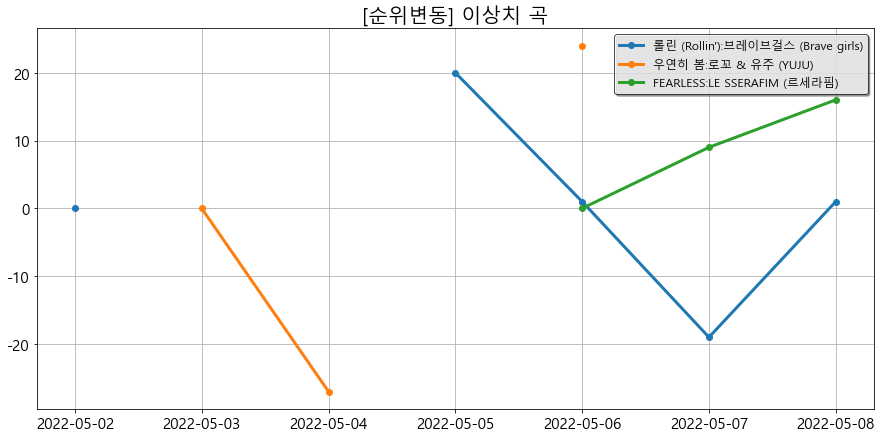

In [183]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [184]:
try:
    os.chdir(code_path)
except:
    pass

In [185]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [186]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [187]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_7432/689724725.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_7432/689724725.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [188]:
driver.quit()

### 파일 이동

In [189]:
import glob
import shutil

In [190]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [191]:
os.listdir()

['(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'backup',
 'D2Coding.ttf',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[genie]20220509_131745_Butter_방탄소년단.csv',
 '[genie]20220509_131753_흔들리는_꽃들_속에서_네_샴푸향이_느껴진거야_장범준.csv',
 '[genie]20220509_131801_Blueming_아이유 (IU).csv',
 '[genie]20220509_131809_이제는_(Feat._화사)_싸이 (Psy).csv',
 '[genie]20220509_131816_헤픈_우연_헤이즈 (Heize).csv',
 '[genie]20220509_131824_Savage_aespa.csv',
 '[genie]20220509_131832_고백_멜로망스 (MeloMance).csv',
 '[genie]20220509_131839_만개_(Prod._신지후)_김호중.csv',
 '[genie]20220509_131847_낙하_(With_아이유)_AKMU (악뮤).csv',
 '[genie]20220509_131854_나보다_더_사랑해요_김호중.csv',
 "[genie]20220509_131902_롤린_(Rollin')_브레이브걸스 (Brave girls).csv",
 '[genie]20220509_131910_우연히_봄_로꼬 & 유주 (YUJU).csv',
 '[genie]20220509_131918_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '당직스케줄_20220426.xlsx',
 

In [192]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[genie]20220509_131745_Butter_방탄소년단.csv',
 '[genie]20220509_131753_흔들리는_꽃들_속에서_네_샴푸향이_느껴진거야_장범준.csv',
 '[genie]20220509_131801_Blueming_아이유 (IU).csv',
 '[genie]20220509_131809_이제는_(Feat._화사)_싸이 (Psy).csv',
 '[genie]20220509_131816_헤픈_우연_헤이즈 (Heize).csv',
 '[genie]20220509_131824_Savage_aespa.csv',
 '[genie]20220509_131832_고백_멜로망스 (MeloMance).csv',
 '[genie]20220509_131839_만개_(Prod._신지후)_김호중.csv',
 '[genie]20220509_131847_낙하_(With_아이유)_AKMU (악뮤).csv',
 '[genie]20220509_131854_나보다_더_사랑해요_김호중.csv',
 "[genie]20220509_131902_롤린_(Rollin')_브레이브걸스 (Brave girls).csv",
 '[genie]20220509_131910_우연히_봄_로꼬 & 유주 (YUJU).csv',
 '[genie]20220509_131918_FEARLESS_LE SSERAFIM (르세라핌).csv']

In [193]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/genie/'

In [194]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

# 코드 마지막